<a href="https://colab.research.google.com/github/lekshmilekshmi/ICT_DSA_ACTIVITIES/blob/main/Lekshmi_unsupervised_Learning_CaseStudy.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder, MinMaxScaler
from sklearn.cluster import KMeans, AgglomerativeClustering
from sklearn.metrics import silhouette_score
from sklearn.decomposition import PCA
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.cluster import DBSCAN

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [ ]:
# 1 DATA LOADING & INITIAL CHECKS

In [ ]:
data = pd.read_csv('/content/adult_dataset.csv')
data.replace('?', np.nan, inplace=True)

In [ ]:
data.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39.0,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40.0,NaN,<=50K
1,50.0,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13.0,United-States,<=50K
2,38.0,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40.0,United-States,<=50K
3,53.0,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40.0,United-States,<=50K
4,28.0,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40.0,Cuba,<=50K


In [ ]:
data = data.drop(['relationship', 'fnlwgt','capital-gain','capital-loss','hours-per-week','education'], axis=1)

In [ ]:
for col in ['occupation', 'native-country', 'age', 'workclass']:
    if data[col].dtype == 'object':
        data[col] = data[col].fillna(data[col].mode()[0])
    else:
        data[col] = data[col].fillna(data[col].median())

In [ ]:
# 2 DATA PREPROCESSING

In [ ]:
categorical_cols = data.select_dtypes(include='object').columns.tolist()
numeric_cols = data.select_dtypes(include=['int64','float64']).columns.tolist()

if 'income' in categorical_cols:
    categorical_cols.remove('income')


In [ ]:
le = LabelEncoder()
for col in categorical_cols:
    data[col] = le.fit_transform(data[col])

In [ ]:
for col in numeric_cols:
    Q1 = data[col].quantile(0.25)
    Q3 = data[col].quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5*IQR
    upper = Q3 + 1.5*IQR
    data[col] = data[col].clip(lower, upper)

In [ ]:
scaler = MinMaxScaler()
data[numeric_cols] = scaler.fit_transform(data[numeric_cols])

In [ ]:
# 3️ EXPLORATORY ANALYSIS

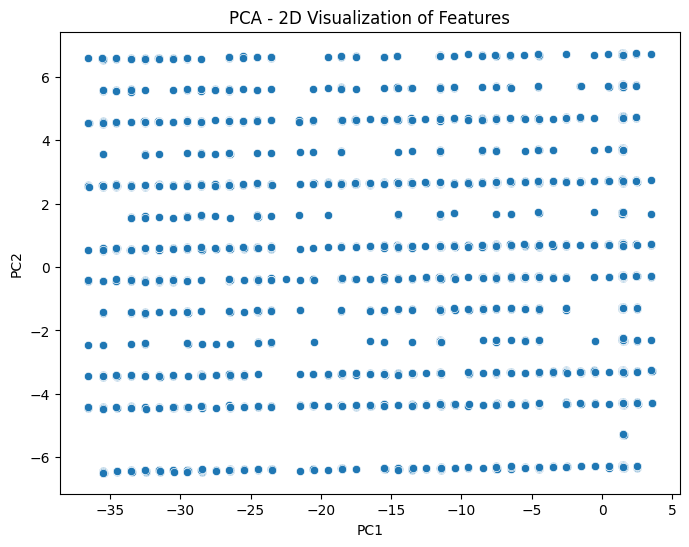

In [ ]:
data_features = data.drop('income', axis=1)
pca = PCA(n_components=2)
data_pca = pca.fit_transform(data_features)
data_pca_df = pd.DataFrame(data_pca, columns=['PC1','PC2'])

plt.figure(figsize=(8,6))
sns.scatterplot(x='PC1', y='PC2', data=data_pca_df)
plt.title('PCA - 2D Visualization of Features')
plt.show()

In [ ]:
# 4️ CLUSTERING

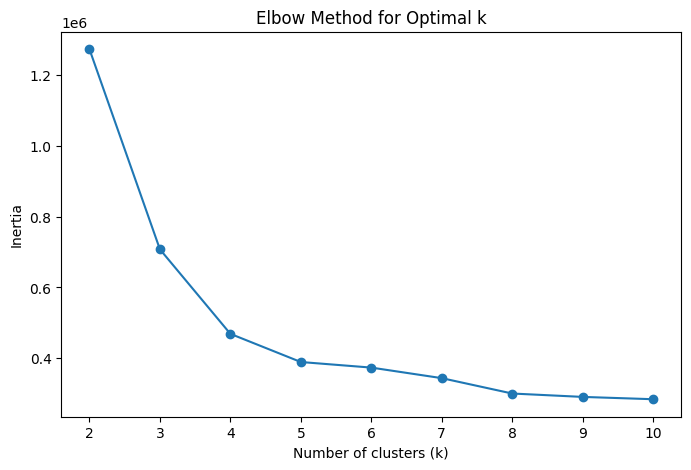

In [ ]:
wcss = []
K = range(2, 11)
for k in K:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(data_features)
    wcss.append(kmeans.inertia_)

plt.figure(figsize=(8,5))
plt.plot(K, wcss, marker='o')
plt.xlabel('Number of clusters (k)')
plt.ylabel('Inertia')
plt.title('Elbow Method for Optimal k')
plt.show()

In [ ]:
scaler = MinMaxScaler()
data_features3_scaled = scaler.fit_transform(data_features)

In [ ]:
kmeans = KMeans(n_clusters=3, random_state=42)
data['Cluster_KMeans'] = kmeans.fit_predict(data_features3_scaled)
score_kmeans = silhouette_score(data_features3_scaled, data['Cluster_KMeans'])
print("K-Means Silhouette Score:", score_kmeans)

K-Means Silhouette Score: 0.35047768401070084


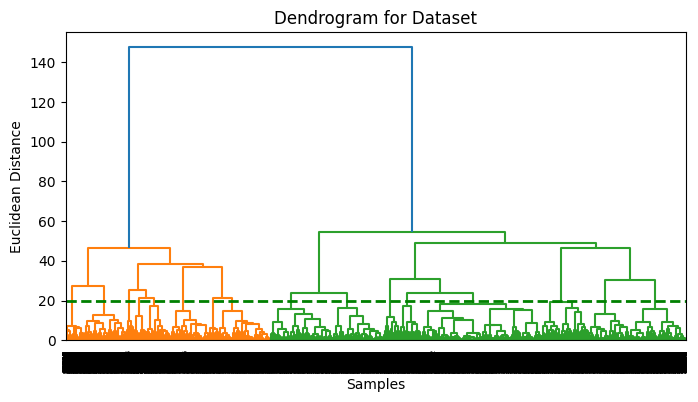

In [ ]:
mergings = linkage(data_features3_scaled, method='ward')
plt.figure(figsize=(8, 4))
dendrogram(mergings)
plt.title('Dendrogram for Dataset')
plt.xlabel('Samples')
plt.ylabel('Euclidean Distance')
plt.axhline(y=20, color='green', linestyle='--', linewidth=2)
plt.show()

In [ ]:
agglo = AgglomerativeClustering(n_clusters=3, metric='euclidean', linkage='ward')
data['Cluster_Agglo'] = agglo.fit_predict(data_features3_scaled)
score_agglo = silhouette_score(data_features3_scaled, data['Cluster_Agglo'])
print("Agglomerative Silhouette Score:", score_agglo)

Agglomerative Silhouette Score: 0.21215803732462


In [ ]:
db = DBSCAN(eps=0.5, min_samples=5)
data['Cluster_DBSCAN'] = db.fit_predict(data_features3_scaled)
score_db = silhouette_score(data_features3_scaled, data['Cluster_DBSCAN'])
print("DBSCAN Silhouette Score:", score_db)

DBSCAN Silhouette Score: 0.39733896019239784


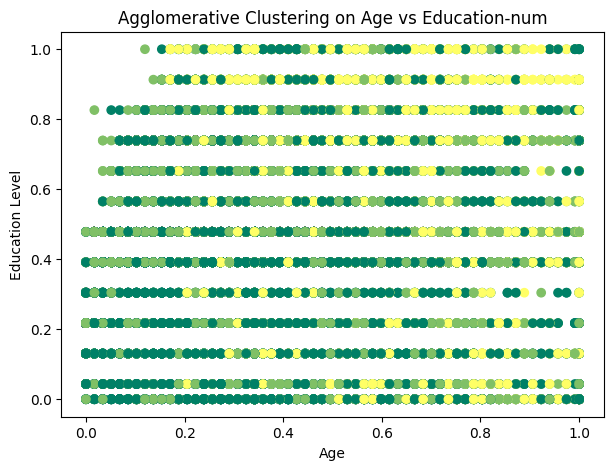

In [ ]:
plt.figure(figsize=(7,5))
plt.scatter(
    data['age'],
    data['education-num'],
    c=data['Cluster_Agglo'],
    cmap='summer'
)
plt.xlabel('Age')
plt.ylabel('Education Level')
plt.title('Agglomerative Clustering on Age vs Education-num')
plt.show()

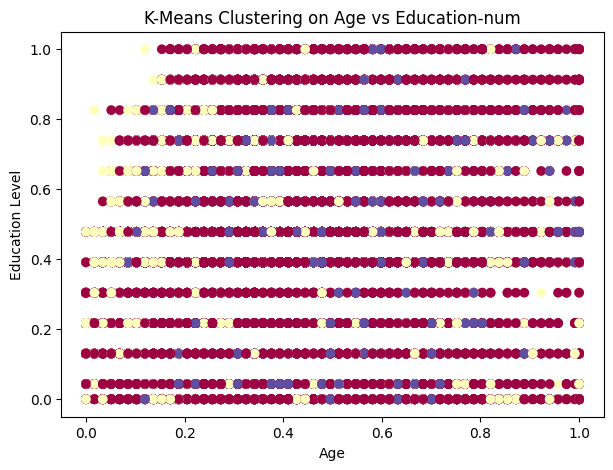

In [ ]:
plt.figure(figsize=(7,5))
plt.scatter(
    data['age'],
    data['education-num'],
    c=data['Cluster_KMeans'],
    cmap='Spectral'
)
plt.xlabel('Age')
plt.ylabel('Education Level')
plt.title('K-Means Clustering on Age vs Education-num')
plt.show()

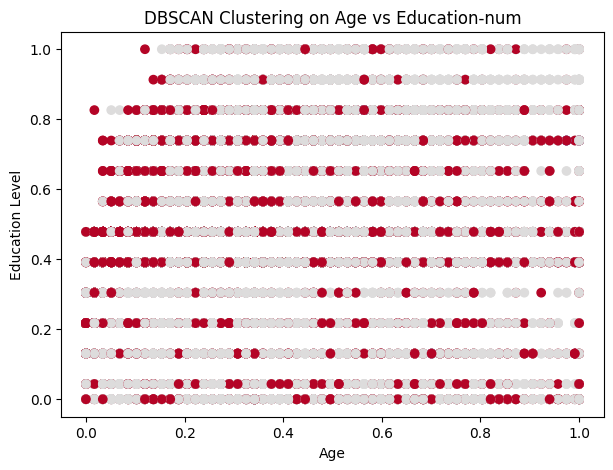

In [ ]:
plt.figure(figsize=(7,5))
plt.scatter(
    data['age'],
    data['education-num'],
    c=data['Cluster_DBSCAN'],
    cmap='coolwarm'
)
plt.xlabel('Age')
plt.ylabel('Education Level')
plt.title('DBSCAN Clustering on Age vs Education-num')
plt.show()

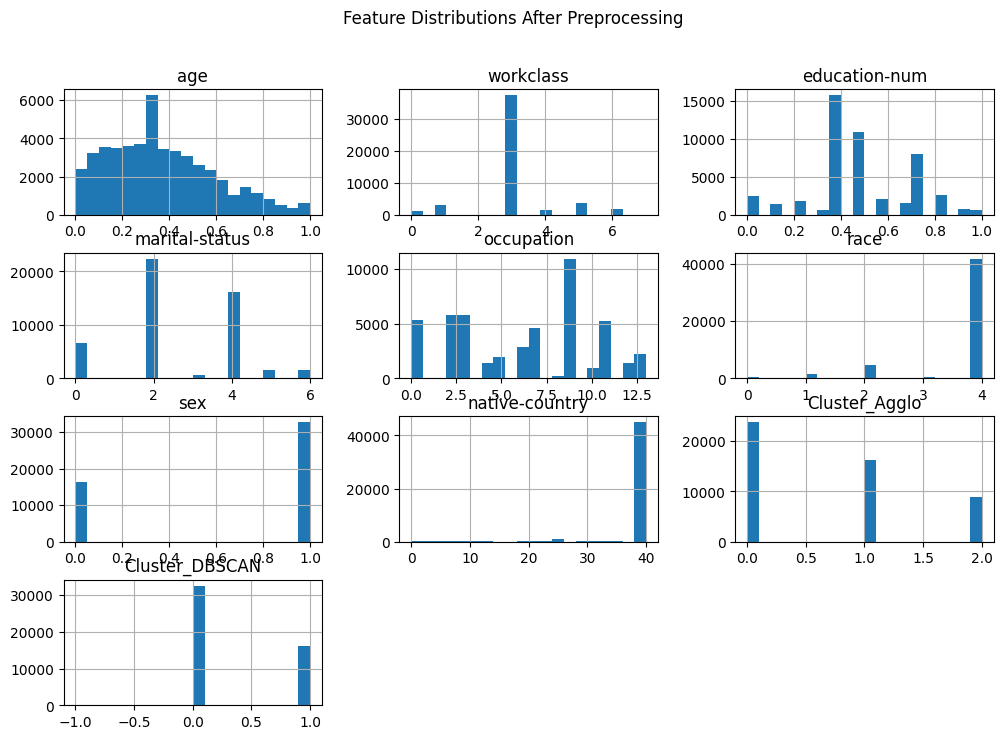

In [ ]:
numeric_cols = data.select_dtypes(include=['int64','float64']).columns.tolist()
data[numeric_cols].hist(figsize=(12, 8), bins=20)
plt.suptitle('Feature Distributions After Preprocessing')
plt.show()


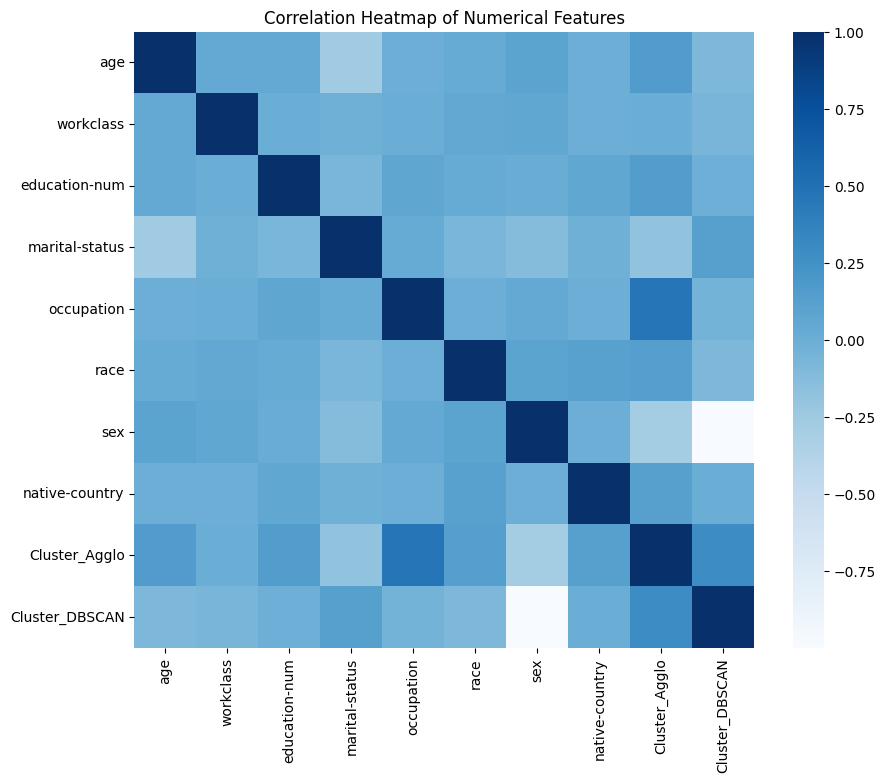

In [ ]:
plt.figure(figsize=(10,8))
sns.heatmap(data[numeric_cols].corr(), cmap='Blues', annot=False)
plt.title("Correlation Heatmap of Numerical Features")
plt.show()

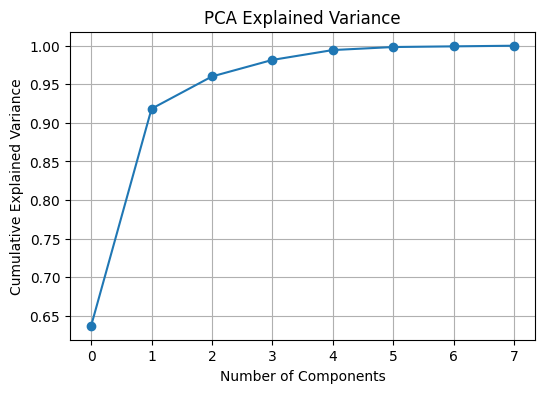

In [ ]:
pca_full = PCA().fit(data_features)
plt.figure(figsize=(6,4))
plt.plot(np.cumsum(pca_full.explained_variance_ratio_), marker='o')
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')
plt.title('PCA Explained Variance')
plt.grid(True)
plt.show()

In [ ]:
# 5️ INTERPRETATION & PROFILING

In [ ]:
def cluster_summary(df, cluster_col):
    print(f"\n===== {cluster_col} Summary =====")
    clusters = df[cluster_col].unique()
    for c in sorted(clusters):
        subset = df[df[cluster_col] == c]
        print(f"\nCluster {c} | Count = {len(subset)} | % = {len(subset)/len(df):.2%}")
        print("Mean Age:", subset['age'].mean())
        if 'education-num' in subset.columns:
            print("Mean Education Level:", subset['education-num'].mean())
        if 'workclass' in subset.columns:
            print("Top Workclass:", subset['workclass'].mode()[0])
        if 'occupation' in subset.columns:
            print("Top Occupation:", subset['occupation'].mode()[0])
        if 'sex' in subset.columns:
            print("Gender Distribution:\n", subset['sex'].value_counts(normalize=True))
        if 'native-country' in subset.columns:
            print("Top Country:", subset['native-country'].mode()[0])
cluster_summary(data, 'Cluster_KMeans')
cluster_summary(data, 'Cluster_Agglo')
cluster_summary(data, 'Cluster_DBSCAN')


===== Cluster_KMeans Summary =====

Cluster 0 | Count = 32650 | % = 66.85%
Mean Age: 0.381982434784885
Mean Education Level: 0.49078766895266
Top Workclass: 3
Top Occupation: 9
Gender Distribution:
 sex
1    1.0
Name: proportion, dtype: float64
Top Country: 38

Cluster 1 | Count = 9713 | % = 19.89%
Mean Age: 0.28106133202395944
Mean Education Level: 0.47534232471944815
Top Workclass: 3
Top Occupation: 9
Gender Distribution:
 sex
0    1.0
Name: proportion, dtype: float64
Top Country: 38

Cluster 2 | Count = 6479 | % = 13.27%
Mean Age: 0.4283081566612976
Mean Education Level: 0.4995403209029843
Top Workclass: 3
Top Occupation: 9
Gender Distribution:
 sex
0    1.0
Name: proportion, dtype: float64
Top Country: 38

===== Cluster_Agglo Summary =====

Cluster 0 | Count = 23737 | % = 48.60%
Mean Age: 0.3486514795863071
Mean Education Level: 0.46412406974252274
Top Workclass: 3
Top Occupation: 2
Gender Distribution:
 sex
1    1.0
Name: proportion, dtype: float64
Top Country: 38

Cluster 1 | Co

In [ ]:
for c in sorted(data['Cluster_KMeans'].unique()):
    subset = data[data['Cluster_KMeans'] == c]
    print(f"Cluster {c} - Income Distribution:")
    print(subset['income'].value_counts(normalize=True))
    print()

Cluster 0 - Income Distribution:
income
<=50K     0.463338
<=50K.    0.232894
>50K      0.204043
>50K.     0.099724
Name: proportion, dtype: float64

Cluster 1 - Income Distribution:
income
<=50K     0.638938
<=50K.    0.322557
>50K      0.024606
>50K.     0.013899
Name: proportion, dtype: float64

Cluster 2 - Income Distribution:
income
<=50K     0.522612
<=50K.    0.262077
>50K      0.145084
>50K.     0.070227
Name: proportion, dtype: float64



In [ ]:
for c in sorted(data['Cluster_Agglo'].unique()):
    subset = data[data['Cluster_Agglo'] == c]
    print(f"Cluster {c} - Income Distribution (Agglomerative):")
    print(subset['income'].value_counts(normalize=True))
    print()

Cluster 0 - Income Distribution (Agglomerative):
income
<=50K     0.505961
<=50K.    0.254666
>50K      0.160003
>50K.     0.079370
Name: proportion, dtype: float64

Cluster 1 - Income Distribution (Agglomerative):
income
<=50K     0.592391
<=50K.    0.298357
>50K      0.072814
>50K.     0.036438
Name: proportion, dtype: float64

Cluster 2 - Income Distribution (Agglomerative):
income
<=50K     0.349826
>50K      0.321328
<=50K.    0.174913
>50K.     0.153932
Name: proportion, dtype: float64



In [ ]:
for c in sorted(data['Cluster_DBSCAN'].unique()):
    subset = data[data['Cluster_DBSCAN'] == c]
    print(f"Cluster {c} - Income Distribution (DBSCAN):")
    print(subset['income'].value_counts(normalize=True))
    print()

Cluster -1 - Income Distribution (DBSCAN):
income
<=50K.    0.444444
<=50K     0.333333
>50K      0.222222
Name: proportion, dtype: float64

Cluster 0 - Income Distribution (DBSCAN):
income
<=50K     0.463377
<=50K.    0.232852
>50K      0.204025
>50K.     0.099746
Name: proportion, dtype: float64

Cluster 1 - Income Distribution (DBSCAN):
income
<=50K     0.592403
<=50K.    0.298332
>50K      0.072823
>50K.     0.036442
Name: proportion, dtype: float64



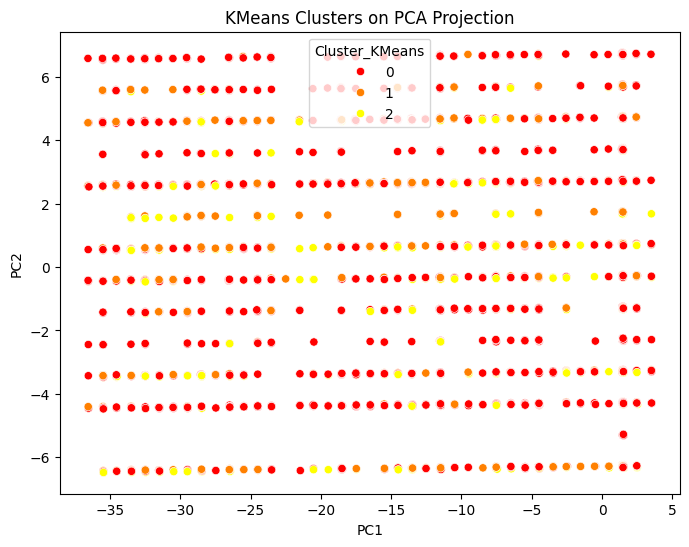

In [ ]:
plt.figure(figsize=(8,6))
sns.scatterplot(x='PC1', y='PC2', hue=data['Cluster_KMeans'], data=data_pca_df, palette='autumn')
plt.title('KMeans Clusters on PCA Projection')
plt.show()


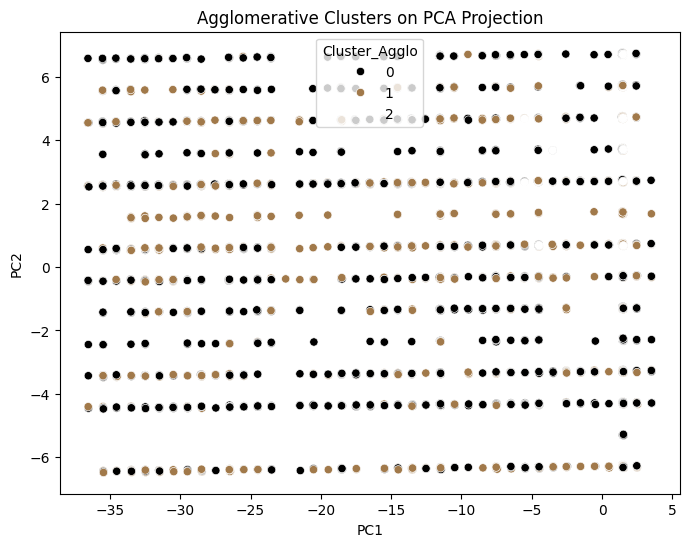

In [ ]:
plt.figure(figsize=(8,6))
sns.scatterplot(x='PC1', y='PC2', hue=data['Cluster_Agglo'], data=data_pca_df, palette='cubehelix')
plt.title('Agglomerative Clusters on PCA Projection')
plt.show()

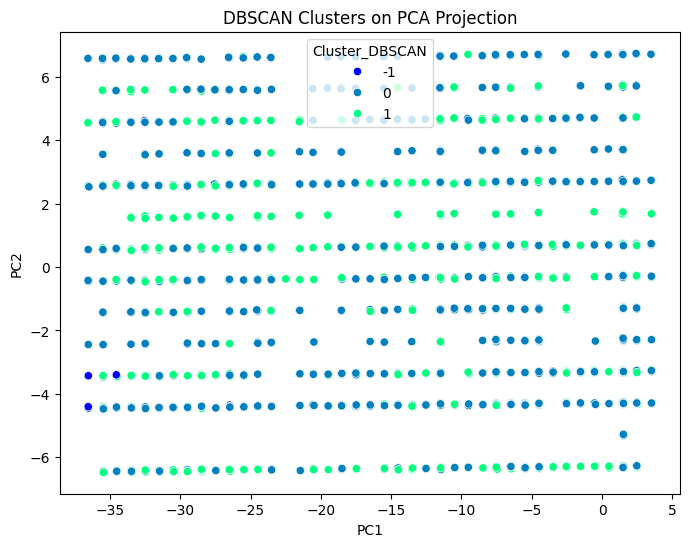

In [ ]:
plt.figure(figsize=(8,6))
sns.scatterplot(x='PC1', y='PC2', hue=data['Cluster_DBSCAN'], data=data_pca_df, palette='winter')
plt.title('DBSCAN Clusters on PCA Projection')
plt.show()

In [ ]:
print("""
Cluster 0: Individuals with lower education and limited occupations
→ Recommend: Upskilling or vocational training programs.

Cluster 1: Middle-level workers with stable jobs and moderate working hours
→ Recommend: Tax reform or professional development programs.

Cluster 2: Highly educated and skilled individuals with high work hours
→ Recommend: Financial literacy, investment planning, or work-life balance initiatives.""")


Cluster 0: Individuals with lower education and limited occupations
→ Recommend: Upskilling or vocational training programs.

Cluster 1: Middle-level workers with stable jobs and moderate working hours
→ Recommend: Tax reform or professional development programs.

Cluster 2: Highly educated and skilled individuals with high work hours
→ Recommend: Financial literacy, investment planning, or work-life balance initiatives.
